<a href="https://colab.research.google.com/github/Suganya12sg/Datascience-project/blob/main/Youtube_Transcription_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transcription using Hugging face transformer and youtube transcript API

In [1]:
!pip install -q transformers

In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

#Source data from youtube video "pros and cons of social media"

In [4]:
youtube_video = "https://www.youtube.com/watch?v=p_5V-k0GH4U"

In [5]:
video_id = youtube_video.split('=')[1]
video_id

'p_5V-k0GH4U'

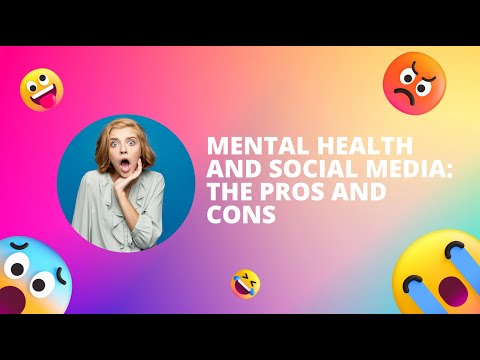

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [7]:
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [8]:
transcript

[{'text': 'hello and welcome back to our Channel',
  'start': 0.359,
  'duration': 4.141},
 {'text': 'where we discuss topics that matter to',
  'start': 2.399,
  'duration': 4.86},
 {'text': 'you today we will be discussing a topic',
  'start': 4.5,
  'duration': 4.26},
 {'text': 'that has been gaining a lot of attention',
  'start': 7.259,
  'duration': 4.141},
 {'text': 'in recent years mental health and social',
  'start': 8.76,
  'duration': 5.879},
 {'text': 'media the pros and cons as social media',
  'start': 11.4,
  'duration': 5.219},
 {'text': 'has become an integral part of our daily',
  'start': 14.639,
  'duration': 4.56},
 {'text': 'lives it has both positive and negative',
  'start': 16.619,
  'duration': 4.981},
 {'text': 'effects on our mental health in this',
  'start': 19.199,
  'duration': 4.561},
 {'text': 'video we will discuss the pros and cons',
  'start': 21.6,
  'duration': 4.2},
 {'text': 'of social media on mental health and',
  'start': 23.76,
  'duration'

# Extracting text from data

In [9]:
text= ""
for i in transcript:
  text +=' '+ i['text']
print (len(text))

3266


In [10]:
str(text)

" hello and welcome back to our Channel where we discuss topics that matter to you today we will be discussing a topic that has been gaining a lot of attention in recent years mental health and social media the pros and cons as social media has become an integral part of our daily lives it has both positive and negative effects on our mental health in this video we will discuss the pros and cons of social media on mental health and ways to use social media in a healthy way let's start with the pros of social media on Mental Health social media has brought people closer and made it easier to connect with people all over the world this is particularly beneficial for people who feel isolated and lonely social media has created online communities and support groups providing people with a sense of belonging and support that they might not have in their offline lives social media has also given people a platform to share their experiences and raise awareness about mental health issues peopl

In [11]:
summarizer= pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access pu

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

#creating chunks and summarizing from every 1000 words and combining all by append for overall summarization.

In [13]:
num_iters = int(len(text)/1000)
summarizer('summarized_text')
summarized_text=[]
for i in range (0,num_iters+1):
  start=0
  start=i*1000
  end=(i+1)*1000
  out= summarizer(text[start:end], min_length=25,max_length=50)
  out=out[0]
  out=out['summary_text']

  summarized_text.append(out)
  print(summarized_text)

Your max_length is set to 142, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


[' Social media has both positive and negative effects on our mental health . We discuss the pros and cons of social media on mental health and ways to use social media in a healthy way .']
[' Social media has both positive and negative effects on our mental health . We discuss the pros and cons of social media on mental health and ways to use social media in a healthy way .', ' Social media has helped reduce the stigma surrounding mental health and has encouraged people to seek help . However social media also has its downsides when it comes to mental health . One of the most significant negative impacts of social media is the impact it']
[' Social media has both positive and negative effects on our mental health . We discuss the pros and cons of social media on mental health and ways to use social media in a healthy way .', ' Social media has helped reduce the stigma surrounding mental health and has encouraged people to seek help . However social media also has its downsides when it

In [14]:
len(str(summarized_text))

909

In [15]:
str(summarized_text)

'[\' Social media has both positive and negative effects on our mental health . We discuss the pros and cons of social media on mental health and ways to use social media in a healthy way .\', \' Social media has helped reduce the stigma surrounding mental health and has encouraged people to seek help . However social media also has its downsides when it comes to mental health . One of the most significant negative impacts of social media is the impact it\', " Social media has both positive and negative impacts on Mental Health . It\'s essential to recognize that social media is not a replacement for real-life connections while social media can provide a sense of community . If you find yourself struggling with mental health", " th mental health issues it\'s important to seek professional help for help . Please share your thoughts or questions about this topic please share them in the comments below ."]'